# 第四章 训练模型

## 线性回归

In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)

In [3]:
y = 4 + 3 * X + np.random.randn(100, 1)

In [4]:
X_b = np.c_[np.ones((100, 1)), X]

In [6]:
X_b[:5]

array([[1.        , 1.12882131],
       [1.        , 0.80755095],
       [1.        , 0.88807573],
       [1.        , 1.09342495],
       [1.        , 1.27794592]])

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[3.97671416],
       [3.1617004 ]])

In [9]:
X_new = np.array([[0], [2]])

In [10]:
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [11]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [12]:
y_predict = X_new_b.dot(theta_best)

In [13]:
y_predict

array([[ 3.97671416],
       [10.30011496]])

In [15]:
import matplotlib.pyplot as plt

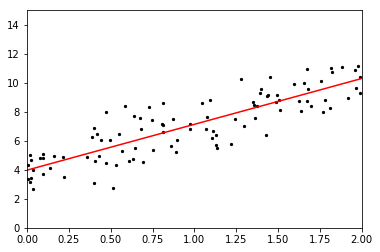

In [25]:
plt.scatter(X, y, c='black', s=5)
plt.plot(X_new, y_predict, "r-")
plt.axis([0, 2, 0, 15])
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression

In [28]:
lin_reg = LinearRegression()

In [29]:
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lin_reg.intercept_

array([3.97671416])

In [31]:
lin_reg.coef_

array([[3.1617004]])

In [32]:
lin_reg.predict(X_new)

array([[ 3.97671416],
       [10.30011496]])

## 批量梯度下降

In [33]:
eta = 0.1
n_iterations = 1000
m = 100

In [34]:
theta = np.random.randn(2, 1)

In [35]:
theta

array([[-0.45301355],
       [-1.08505882]])

In [37]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [38]:
theta

array([[3.97671416],
       [3.1617004 ]])

## 随机梯度下降

In [39]:
n_epochs = 50
t0, t1 = 5, 50

In [40]:
def learning_schedule(t):
    return t0 / (t + t1)

In [41]:
theta = np.random.randn(2, 1)

In [43]:
np.random.randint(m)

43

In [44]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [45]:
theta

array([[3.90641525],
       [3.26415201]])

In [46]:
from sklearn.linear_model import SGDRegressor

In [48]:
sgd_reg = SGDRegressor(n_iter_no_change=50, penalty=None, eta0=0.1)

In [50]:
y.ravel()

array([ 6.39224079,  7.12722048,  5.1961704 ,  8.78253619, 10.23781299,
        9.585107  ,  7.97564627,  7.97522386,  4.9746721 ,  9.671807  ,
        4.34749533,  8.39680531, 10.74434103,  4.63108747,  2.67511719,
        7.05619326,  6.03395609,  7.46794968,  8.80366717,  4.99054432,
        4.90852276,  9.05831073,  8.7742513 ,  4.74419999,  5.7784113 ,
        6.49880093,  5.3039858 ,  2.7680627 ,  5.4761459 , 10.91168688,
        8.468129  ,  8.07895524,  4.82285647,  3.15400038,  8.37081284,
        8.28188058,  3.51682947,  8.70222908,  6.57738313,  4.88675022,
        3.11190724,  6.25929609,  8.81595724,  7.11098544,  7.52456661,
        4.58394579,  5.72066238,  3.38006971,  9.29927048,  3.44754394,
        3.96661427,  4.92707728,  9.93160105,  7.64232945,  4.69613187,
        4.50584058,  4.11079784,  7.50014189,  5.09919245,  6.88318902,
        7.15668958,  8.68797062,  8.6180734 ,  7.57306718,  8.12842003,
       10.37520842,  5.49180441,  3.69914579,  9.3204887 ,  7.60

In [51]:
X

array([[1.12882131],
       [0.80755095],
       [0.88807573],
       [1.09342495],
       [1.27794592],
       [1.39664242],
       [0.46991036],
       [1.77105581],
       [0.16059909],
       [1.96419292],
       [0.00555138],
       [1.69586691],
       [1.82441341],
       [0.40818983],
       [0.03569043],
       [1.2967733 ],
       [0.44420322],
       [0.74439271],
       [1.50861199],
       [0.02049607],
       [0.21824605],
       [1.43590412],
       [1.67009477],
       [0.63294918],
       [1.21661291],
       [0.55151732],
       [0.56512111],
       [0.51213083],
       [0.64765314],
       [1.95961738],
       [1.35913614],
       [1.63946467],
       [0.07906521],
       [0.01801238],
       [0.58808819],
       [1.80747929],
       [0.22222136],
       [1.35016966],
       [0.81276505],
       [0.36163875],
       [0.4016141 ],
       [0.38938302],
       [1.78238962],
       [0.80978532],
       [1.24282037],
       [0.61043537],
       [1.12918229],
       [0.006

In [52]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=50, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [53]:
sgd_reg.intercept_

array([3.98451594])

In [54]:
sgd_reg.coef_

array([3.18085631])

## 小批量梯度下降